# Procesamiento de Imágenes - Trabajo Práctico N° 6

## Grupo 3
* Santiago Arribére
* Matias Francois
* Joaquín Gaytan
* Pablo Scheinfeld

In [1]:
import cv2
import numpy as np

from matplotlib import pyplot as plt
from matplotlib import cm
from matplotlib import colors
from mpl_toolkits.mplot3d import Axes3D

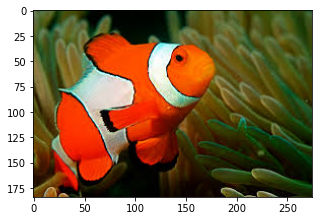

In [2]:
nemo = cv2.cvtColor(cv2.imread('../assets/nemo.jpg'), cv2.COLOR_BGR2RGB)
plt.figure(figsize=(5,5))
plt.imshow(nemo)
plt.show()

## Visualizacion en el espacio de color RGB

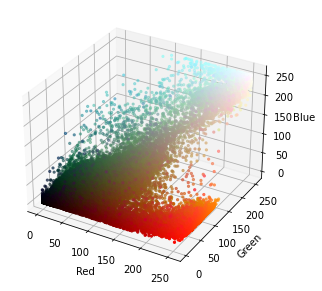

In [3]:
r, g, b = cv2.split(nemo)
fig = plt.figure(figsize=(5,5))
axis = fig.add_subplot(1, 1, 1, projection="3d")

pixel_colors = nemo.reshape((np.shape(nemo)[0]*np.shape(nemo)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

axis.scatter(r.flatten(), g.flatten(), b.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
plt.show()

Se puede apreciar como las zonas naranjas de la imagen se encuentran presentes en casi todo el rango de valores de r, g y b, por lo tanto no es sencillo parametrizar las zonas naranjas para poder extraerlas de la imagen. Para lo cual se buscará utilizar otro espacio de color para resolver la tarea de separar al pez del resto de la imagen.

## Visualizacion en el espacio de color HSV

In [4]:
hsv_nemo = cv2.cvtColor(nemo, cv2.COLOR_RGB2HSV)

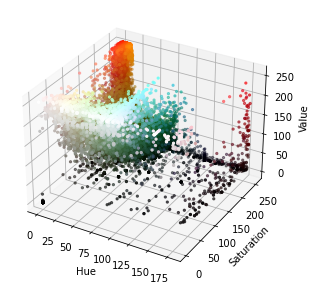

In [5]:
h, s, v = cv2.split(hsv_nemo)
fig = plt.figure(figsize=(5,5))
axis = fig.add_subplot(1, 1, 1, projection="3d")

axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show()

En el espacio de color HSV, los pixeles de color naranja correspondientes a la figura del pez payaso se encuentran mucho mas localizados y separables. Se puede apreciar que a pesar de que el valor de saturación pueda variar, se encuentran localizados en pequeño rango a lo largo del eje hue, lo cual es la clave para realizar la segmentación.

## Sacando a Nemo

In [6]:
light_orange = (1, 190, 200)
dark_orange = (18, 255, 255)

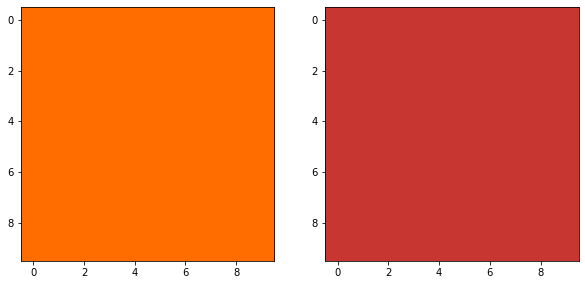

In [7]:
lo_square = np.full((10, 10, 3), light_orange, dtype=np.uint8) / 255.0
do_square = np.full((10, 10, 3), dark_orange, dtype=np.uint8) / 255.0

plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.imshow(colors.hsv_to_rgb(do_square))
plt.subplot(1, 2, 2)
plt.imshow(colors.hsv_to_rgb(lo_square))
plt.show()

A continuación se genera una máscara a partir de dos colores seleccionados, la cual abarca todos los pixeles de la imagen que se encuentren dentro de dos colores especificados en formato HSV.

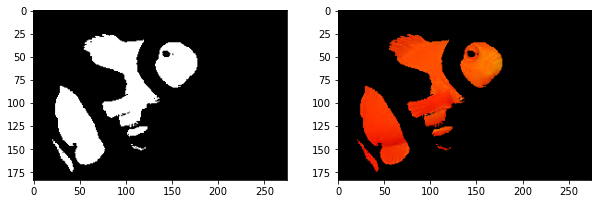

In [8]:
mask = cv2.inRange(hsv_nemo, light_orange, dark_orange)
result = cv2.bitwise_and(nemo, nemo, mask=mask)

plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.imshow(mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.show()

Para poder extraer completamente al pez payaso primero se busca una máscara correspondiente a las zonar naranjas y a continuación una máscara para las zonas blancas de la imagen.

In [9]:
light_white = (0, 0, 200)
dark_white = (145, 60, 255)

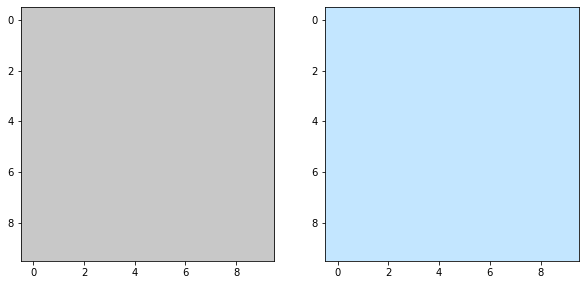

In [10]:
lw_square = np.full((10, 10, 3), light_white, dtype=np.uint8) / 255.0
dw_square = np.full((10, 10, 3), dark_white, dtype=np.uint8) / 255.0

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(colors.hsv_to_rgb(lw_square))
plt.subplot(1, 2, 2)
plt.imshow(colors.hsv_to_rgb(dw_square))
plt.show()

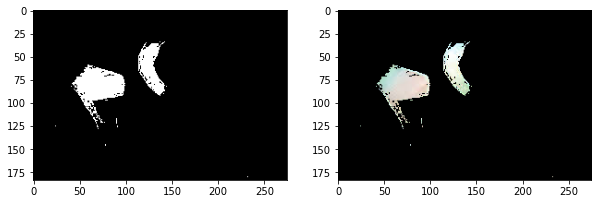

In [11]:
mask_white = cv2.inRange(hsv_nemo, light_white, dark_white)
result_white = cv2.bitwise_and(nemo, nemo, mask=mask_white)

plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.imshow(mask_white, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result_white)
plt.show()

Finalmente se combinan ambas mascaras para extraer al pez payaso completo de la imagen.

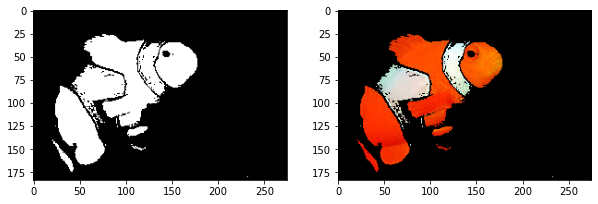

In [12]:
final_mask = mask + mask_white

final_result = cv2.bitwise_and(nemo, nemo, mask=final_mask)
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.imshow(final_mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(final_result)
plt.show()

In [13]:
cv2.imwrite('output/nemo_detected.jpg', cv2.cvtColor(final_result, cv2.COLOR_RGB2BGR))

True